In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt #easy plotting: subpackage of seaborn
import seaborn as sns

In [10]:
pip install pygal_maps_world

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pygal_maps_world.maps import World

# Part 1: K-means
We use the 2019 happiness index dataset available here: https://www.kaggle.com/unsdsn/world-happiness 
We have removed the columns giving us the ranking and the score of each country and just kept the bare-bones indicators. The goal is to cluster the countries into countries with similar attributes.

In [2]:
happiness=pd.read_csv("countries_indicators.csv")
happiness

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Code
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393,fi
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,dk
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341,no
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,is
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,nl
...,...,...,...,...,...,...,...,...
140,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411,rw
141,Tanzania,0.476,0.885,0.499,0.417,0.276,0.147,tz
142,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025,af
143,Central African Republic,0.026,0.000,0.105,0.225,0.235,0.035,cf


In [3]:
from sklearn.cluster import KMeans

## A. How to run K-means in Python?
We start with a basic version of K-means to just get used to the set-up in Python. We pick the number of clusters to be equal to 3 and we do no pre-processing. We drop the country or region column as well as the country code for this purpose as K-means works on numerical data.


In [5]:
happiness_quant=happiness.drop(columns=["Country or region","Code"])

1. Run the code below to run K-means

In [6]:
kmeans = KMeans(n_clusters=3).fit(happiness_quant)

2. Run the two snippets of code below. What do you think they are giving us?

In [7]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [8]:
kmeans.cluster_centers_

array([[0.38583721, 0.8804186 , 0.42716279, 0.32669767, 0.20674419,
        0.09760465],
       [0.96272131, 1.27508197, 0.77152459, 0.37818033, 0.15322951,
        0.07231148],
       [1.35836585, 1.46834146, 0.97190244, 0.49295122, 0.2077561 ,
        0.19041463]])

3. Run the code below to plot the three clusters on a map. The map you produce will appear in the folder where you have downloaded this file as .svg file viewable on line. Make sure to go look there!

In [12]:
labels=kmeans.labels_
df=pd.DataFrame(labels,columns=['Cluster'])
df["Code"]=happiness.Code

wm = World()
wm.force_uri_protocol = 'http'

cluster0=pd.Series.to_numpy(df[df["Cluster"]==0]["Code"])
cluster1=pd.Series.to_numpy(df[df["Cluster"]==1]["Code"])
cluster2=pd.Series.to_numpy(df[df["Cluster"]==2]["Code"])

wm.add('Cluster 0', cluster0)
wm.add('Cluster 1',cluster1)
wm.add('Cluster 2',cluster2)

wm.render_to_file('map.svg')

## B. Impact of initialization

1. Run the code below twice, saving the map each time under a different name. Are the two maps obtained the same?

In [76]:
from sklearn import preprocessing
happiness_quant=preprocessing.scale(happiness_quant)

kmeans = KMeans(n_clusters=4,n_init=1).fit(happiness_quant)

#plotting
labels=kmeans.labels_
df=pd.DataFrame(labels,columns=['Cluster'])
df["Code"]=happiness.Code

wm = World()
wm.force_uri_protocol = 'http'

cluster0=pd.Series.to_numpy(df[df["Cluster"]==0]["Code"])
cluster1=pd.Series.to_numpy(df[df["Cluster"]==1]["Code"])
cluster2=pd.Series.to_numpy(df[df["Cluster"]==2]["Code"])
cluster3=pd.Series.to_numpy(df[df["Cluster"]==3]["Code"])

wm.add('Cluster 0', cluster0)
wm.add('Cluster 1',cluster1)
wm.add('Cluster 2',cluster2)
wm.add('Cluster 3',cluster3)

wm.render_to_file('map2a.svg')

2. The code above is exactly the same in both cases. What leads to the differences observed?

## C. Choosing the right K

1. Run the code below. What are we getting? **(Ignore the warning if you get one)**

In [10]:
inertia_K=[]
K = range(1,10)
for k in K:
    kmeans =KMeans(n_clusters=k).fit(happiness_quant)
    inertia_K.append(kmeans.inertia_)

C:\Users\georgina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2. Plot inertia_K as a function of K using `plt.plot`. What value would you choose for K?

Text(0.5, 1.0, 'Elbow plot')

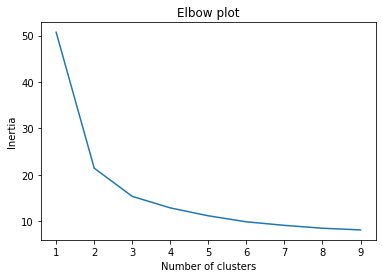

In [14]:
plt.plot(K,inertia_K)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow plot")

# Part 2: Hierarchical clustering

Exceptionally, we use `scipy` rather than `scikit-learn` as scikit-learn does not have an easy module for drawing dendograms.


**Only run the cell below if you're using Anaconda**

In [25]:
conda install -c anaconda scipy


Note: you may need to restart the kernel to use updated packages.


**Everbody needs to run the cell below**

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
happiness=pd.read_csv("countries_indicators.csv")
happiness_quant=happiness.drop(columns=["Country or region","Code"])

1. Use the code below to draw the dendogram using the `average` method you just saw by hand. Be sure to scroll all the way down to the end to see the dendrogram. How many clusters would you pick based on it?

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [60.0, 60.0, 91.25, 91.25],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [220.0, 220.0, 243.75, 243.75],
  [192.5, 192.5, 231.875, 231.875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [212.1875, 212.1875, 283.75, 283.75],
  [175.0, 175.0, 247.96875, 247.96875],
  [160.0, 160.0, 211.484375, 211.484375],
  [140.0, 140.0, 185.7421875, 185.7421875],
  [125.0, 125.0, 162.87109375, 162.87109375],
  [75.625, 75.625, 143.935546875, 143.935546875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 31

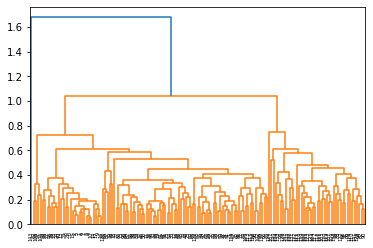

In [18]:
Z = linkage(happiness_quant,method='average')

dendrogram(Z)

2. Use the code below to find the cluster assignment for average linkage that gives the most balanced graph.

In [20]:
labels=fcluster(Z, 3, criterion='maxclust')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2], dtype=int32)

3. Use this code below to obtain the map of the world with this clustering. What do you think of the quality of the clusters?

In [21]:
df=pd.DataFrame(labels,columns=['Cluster'])
df["Code"]=happiness.Code

wm = World()
wm.force_uri_protocol = 'http'

cluster1=pd.Series.to_numpy(df[df["Cluster"]==1]["Code"])
cluster2=pd.Series.to_numpy(df[df["Cluster"]==2]["Code"])
cluster3=pd.Series.to_numpy(df[df["Cluster"]==3]["Code"])

wm.add('Cluster 1',cluster1)
wm.add('Cluster 2',cluster2)
wm.add('Cluster 3', cluster3)

wm.render_to_file('map3.svg')